In [1]:
%matplotlib inline

import datetime
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from math import sqrt

In [98]:
datetime.datetime.strptime("2017-02-17", "%Y-%m-%d")

datetime.datetime(2017, 2, 17, 0, 0)

In [38]:
aapl = pdr.get_data_yahoo('GOOGL', 
                          start=datetime.datetime(2000, 10, 1), 
                          end=datetime.datetime(2017, 6, 1))

In [40]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000
2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300
2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100
2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600


In [15]:
aapl["Daily Return"] = aapl["Close"]/aapl["Close"].shift(1) - 1

In [17]:
aapl.head()

,Open,High,Low,Close,Volume,Daily Return
Date,,,,,,
2001-07-06,1.63,1.64,1.55,1.57,71285200,NaN
2001-07-09,1.58,1.64,1.55,1.62,83522600,0.031847
2001-07-10,1.64,1.65,1.49,1.51,91222600,-0.067901
2001-07-11,1.50,1.61,1.50,1.61,115561600,0.066225
2001-07-12,1.66,1.77,1.66,1.74,147938000,0.080745


In [110]:
order = pd.read_csv("order.csv", header=None, 
                    names=["command", "ticker", "vol"], 
                   parse_dates=True)
order.head()

,command,ticker,vol
2017-02-17,BUY,AAPL,100
2017-03-20,BUY,AAPL,100
2017-04-21,BUY,GOOG,100


In [31]:
Stdev = aapl["Daily Return"].std()
k = sqrt(250)
Sharp_r = k * aapl["Daily Return"].mean() / aapl["Daily Return"].std()

print("AAPL:")
print("\tDaily return stdev={:.2f}%".format(Stdev * 100))
print("\tSharp Ratio={:.2f}".format(Sharp_r))

AAPL:
	Daily return stdev=2.44%
	Sharp Ratio=0.88


# Growth model 

A compagny provided in the past a divident of \$3 ($D_0$) each year. We supose 8% ($g$) increase each year. 

Next year you will get:
$$ D_1 = D_0 (1 + g)$$

In two years of investisment you will get:
$$ D_2 = D_0 \left[ (1 + g) + (1 + g)^2 \right]$$

In $n$ years you will get:
$$ D_n = D_0 \left[ (1 + g) + \dots + (1 + g)^n \right] $$

the present value after one year of investistement: 

$$P_1= \frac{D_0}{(1 + g)}$$

the present value after $n$ year of investistement: 

$$P_n= \frac{D_0}{(1 + g)^n}$$

The cumulative present value is the sum of $n$ year of investistement:
$$CP_n= D_0 \sum^{n}_{i=1} \frac{1}{(1 + g)^i}$$

** Recall the Geometric series**
$$S_n = a \sum_{i=0}^{n-1} r^i = a \sum_{i=1}^{n} r^{(i-1)} =  a/r\sum_{i=1}^{n} r^i = \frac{a}{1-r}$$ 

$$S_n \approx \frac{a}{1-r} \text{when } |r| < 1 \text{ and } n \rightarrow \infty$$

$$a\sum_{i=1}^{n} r^i \approx \frac{a r}{1-r} \text{when } |r| < 1 \text{ and } n \rightarrow \infty$$

as consequence when $r = \frac{1}{1+g}$: 

$$CP_n = a\sum_{i=1}^{n} r^i = a\frac{1}{1+g}\frac{1}{1-1/(1+g)} = a\frac{1}{1+g}\frac{1}{\frac{g}{1+g}} = \frac{a}{g} = \frac{a}{1-\gamma} \text{where } \gamma = 1-g \text{ and }  n \rightarrow \infty $$


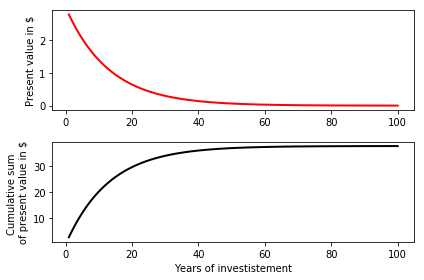

In [226]:
N=100
D = np.zeros(N)
x = np.arange(1,N+1)
for i in range(1, N): 
    D[i-1] = 3 / (1 + 0.08)**i
    
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(x, D, 'r-', lw=2)
ax2.plot(x, np.cumsum(D), 'k-', lw=2)

ax2.set_xlabel("Years of investistement")
ax1.set_ylabel("Present value in $")
ax2.set_ylabel("Cumulative sum \nof present value in $")
plt.tight_layout()
plt.show()

# Capital Asset Pricing Model - CAPM

First the $\bar{R}_a$ the Expected Return is computed as follow
$$\bar{R}_a = R_f + \beta_a (\bar{R}_m - R_f)$$

where:
* $R_f$ Risk Free Rate (2% for instance)
* $\beta_a$ beta of the security
* $\bar{R}_m$ Expected market return

IBM payed \$5.00 a share in 2016 and \$4.25 in 2015. A growth of 17%

In [66]:
ibm = pdr.get_data_yahoo('IBM', 
                          start=datetime.datetime(2016, 1, 1), 
                          end=datetime.datetime(2017, 1, 1))

In [148]:
ibm_dividende = pd.DataFrame([5.50, 5.00, 4.25, 3.70, 3.30], columns=["dividende"])

ibm_dividende["growth"] = (ibm_dividende["dividende"].shift(1) - ibm_dividende["dividende"]) / ibm_dividende["dividende"].shift(1)

print(ibm_dividende["growth"].mean())

0.11960724093077035


In [74]:
ibm["Daily Return"] = ibm["Adj Close"]/ibm["Adj Close"].shift(1) - 1
beta_a = ibm["Daily Return"].std() * 100

In [113]:
sp = pdr.get_data_yahoo('^GSPC', 
                        start=datetime.datetime(2016, 1, 1), 
                        end=datetime.datetime(2016, 12, 30))

In [129]:
R_m = (sp["Adj Close"].iloc[-1] - sp["Adj Close"].iloc[0]) / sp["Adj Close"].iloc[0] 

In [134]:
R_f = 0.02
print(beta_a, R_m, R_f)
R_a = R_f + beta_a * (R_m - R_f)
print(R_a)

1.2444356065513185 0.112373694603 0.02
0.134953114672


# Constant Growth Dividend Discount Model

$$P = D_0 \frac{(1+g)}{k-g}$$

In [227]:
g = ibm_dividende["growth"].mean()
D0 = 5
k = 0.13

P = D0*(1+g)/(k-g)
print(P)

538.6477418906237


In [228]:
3 / (1 - 0.08)

3.260869565217391

In [146]:
start = "2017-01-01"
end = "2017-07-06"
tickers = set(order["ticker"].values)
flag = True
stocks = []
stocks_ticker = []
for ticker in tickers:
    s = pdr.get_data_google(ticker, 
                            start, 
                            end)["Close"]
    stocks.append(s)
    stocks_ticker.append(ticker)
df = pd.concat(stocks, axis=1)
df.columns = stocks_ticker

In [147]:
df

,GOOG,AAPL
Date,,
2017-01-03,786.14,116.15
2017-01-04,786.90,116.02
2017-01-05,794.02,116.61
2017-01-06,806.15,117.91
2017-01-09,806.65,118.99
2017-01-10,804.79,119.11
2017-01-11,807.91,119.75
2017-01-12,806.36,119.25
2017-01-13,807.88,119.04


In [134]:
df

Date,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,2017-01-17 00:00:00,...,2017-06-22 00:00:00,2017-06-23 00:00:00,2017-06-26 00:00:00,2017-06-27 00:00:00,2017-06-28 00:00:00,2017-06-29 00:00:00,2017-06-30 00:00:00,2017-07-03 00:00:00,2017-07-05 00:00:00,2017-07-06 00:00:00
Close,786.140000,786.900000,794.020000,806.150000,806.650000,804.790000,807.91,806.36,807.880000,804.61,...,957.090000,965.590000,952.270000,927.330000,940.490000,917.790000,908.730000,898.7,911.710000,906.690000
Close,116.150002,116.019997,116.610001,117.910004,118.989998,119.110001,119.75,119.25,119.040001,120.00,...,145.630005,146.279999,145.820007,143.729996,145.830002,143.679993,144.020004,143.5,144.089996,142.729996


In [91]:
def simulation(capital):
    for key, val in order.iterrows():
        if val["command"] == "BUY":
            capital -= val["vol"] * get_close_price(val["ticker"], key)
        if val["command"] == "SELL":
            capital += val["vol"] * get_close_price(val["ticker"], key)
        print(val["command"], capital)

In [92]:
def get_close_price(ticker, date):
    stock = pdr.get_data_yahoo(ticker, 
                          start=date, 
                          end=date)
    return stock.iloc[0]["Adj Close"]

In [93]:
get_close_price("AAPL", "2017-02-17")

134.633408

In [95]:
simulation(100000)

BUY 86536.6592
BUY 72503.9138
BUY 58390.8172


In [125]:
l

['test', 'toto']